In [1]:
import pandas as pd
from cloudmesh.common.util import readfile
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
filename="mnist.log.log"

content = readfile ("mnist.log.log").splitlines()

header = "time,gpu_util,memory_util,encoder_util,decoder_util,gpu_temp_C,power_draw_W"
result = ""
for line in content:
    if not line.startswith("#") and not line.startswith(" ") and not line.startswith("\n") and not line.startswith("gpu"):
        result = result + line + "\n"

result = header + "\n" + result



csvStringIO = StringIO(result)

df = pd.read_csv(csvStringIO, comment='#', sep=",") 

df.time = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S.%f')
df["x"] = df.index

df

,time,gpu_util,memory_util,encoder_util,decoder_util,gpu_temp_C,power_draw_W,x
0,2022-03-15 12:56:26.143543,36,1,0,0,51,116.27,0
1,2022-03-15 12:56:26.309014,36,1,0,0,51,123.73,1
2,2022-03-15 12:56:26.451868,0,1,0,0,51,136.45,2
3,2022-03-15 12:56:26.593504,5,1,0,0,51,136.33,3
4,2022-03-15 12:56:26.735810,20,1,0,0,51,136.61,4
...,...,...,...,...,...,...,...,...
163,2022-03-15 12:56:33.253895,24,3,0,0,52,145.04,163
164,2022-03-15 12:56:33.393750,14,1,0,0,52,144.40,164
165,2022-03-15 12:56:33.538253,7,1,0,0,52,142.76,165
166,2022-03-15 12:56:33.697652,7,1,0,0,52,141.81,166


In [15]:
df["time"]

0     2022-03-15 12:56:26.143543
1     2022-03-15 12:56:26.309014
2     2022-03-15 12:56:26.451868
3     2022-03-15 12:56:26.593504
4     2022-03-15 12:56:26.735810
                 ...            
163   2022-03-15 12:56:33.253895
164   2022-03-15 12:56:33.393750
165   2022-03-15 12:56:33.538253
166   2022-03-15 12:56:33.697652
167   2022-03-15 12:56:33.844200
Name: time, Length: 168, dtype: datetime64[ns]

<AxesSubplot:xlabel='time', ylabel='gpu_util'>

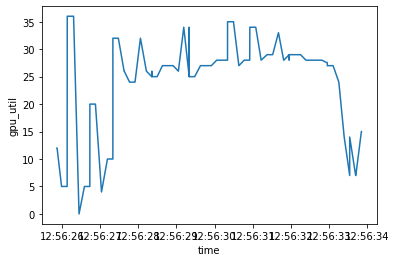

In [26]:
sns.lineplot(y='gpu_util', x="time", data=df)

<AxesSubplot:xlabel='time', ylabel='gpu_temp_C'>

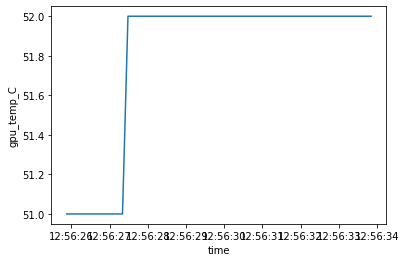

In [27]:
sns.lineplot(y='gpu_temp_C', x="time", data=df)

<AxesSubplot:xlabel='time', ylabel='power_draw_W'>

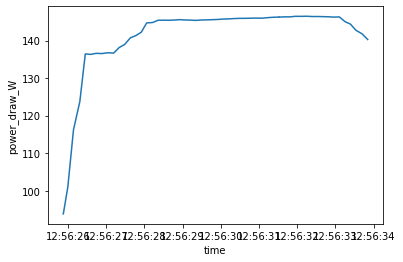

In [28]:
sns.lineplot(y='power_draw_W', x="time", data=df)